# Modelling

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 20 }
plt.rc('font', **font)

In [3]:
data_path = '../../data/'

In [4]:
X_train = np.load(os.path.join(data_path, 'X_train.npy'), allow_pickle=True)
X_val = np.load(os.path.join(data_path, 'X_val.npy'), allow_pickle=True)
y_train = np.load(os.path.join(data_path, 'y_train.npy'), allow_pickle=True)
y_val = np.load(os.path.join(data_path, 'y_val.npy'), allow_pickle=True)

In [5]:
X_train[0]

array([25.,  4.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.])

### Dummy Classifier

In [6]:
dummy = DummyClassifier(random_state=42)

In [7]:
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=42, strategy='stratified')

In [8]:
dummy.score(X_val, y_val)

0.47785714285714287

In [9]:
dummy.classes_

array([False,  True])

In [10]:
y_pred_dummy = dummy.predict(X_val)

In [11]:
f1_score(y_val, y_pred_dummy)

0.4826610049539986

In [12]:
print(classification_report(y_val, y_pred_dummy))

              precision    recall  f1-score   support

       False       0.47      0.48      0.47       690
        True       0.49      0.48      0.48       710

    accuracy                           0.48      1400
   macro avg       0.48      0.48      0.48      1400
weighted avg       0.48      0.48      0.48      1400



### Random Forest

In [13]:
model = RandomForestClassifier(n_estimators=10, random_state=42)

In [14]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [15]:
model.score(X_val, y_val)

0.49357142857142855

In [16]:
model.classes_

array([False,  True])

In [17]:
model.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
y_pred = model.predict(X_val)

In [19]:
f1_score(y_val, y_pred)

0.46970830216903514

In [20]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.49      0.55      0.52       690
        True       0.50      0.44      0.47       710

    accuracy                           0.49      1400
   macro avg       0.49      0.49      0.49      1400
weighted avg       0.49      0.49      0.49      1400



In [21]:
importances = model.feature_importances_

In [22]:
indices = np.argsort(importances)[::-1]

In [23]:
with open('../../data/feature_names.txt') as f:
    feature_names = [ line.strip() for line in f.readlines() ]

In [24]:
# Print the feature ranking
print("Feature ranking:")
for f in range(len(feature_names))[:25]:
    print("%d. Feature %s [%d] (%f)" % (f + 1, feature_names[indices[f]], indices[f], importances[indices[f]]))
print('etc')

Feature ranking:
1. Feature Age [0] (0.339414)
2. Feature GPA [1] (0.212854)
3. Feature Race_Other [25] (0.025041)
4. Feature Race_Latino [24] (0.024921)
5. Feature Race_White [26] (0.024130)
6. Feature Race_Asian [22] (0.023830)
7. Feature Race_Black [23] (0.022593)
8. Feature Gender_F [2] (0.021023)
9. Feature Qualification_type_1 [5] (0.020085)
10. Feature Qualification_type_2 [6] (0.019781)
11. Feature Qualification_type_4 [8] (0.019534)
12. Feature Gender_M [3] (0.018688)
13. Feature Qualification_type_3 [7] (0.018119)
14. Feature Job_Type_Human Resources [13] (0.017909)
15. Feature Job_Type_Product Management [16] (0.017618)
16. Feature Job_Type_Sales [18] (0.017540)
17. Feature Job_Type_Accounting [10] (0.017198)
18. Feature Job_Type_Research and Development [17] (0.016865)
19. Feature Job_Type_Support [20] (0.016416)
20. Feature Job_Type_Services [19] (0.016172)
21. Feature Qualification_type_5 [9] (0.016143)
22. Feature Job_Type_Legal [14] (0.015949)
23. Feature Job_Type_Engin

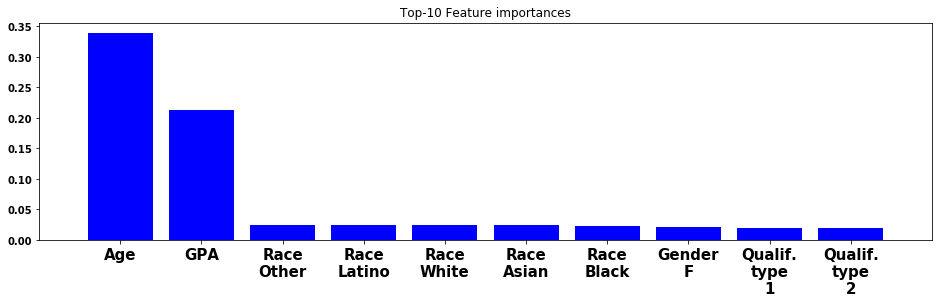

In [25]:
N = 10

# Plot the feature importances of the forest
plt.figure(figsize=(16, 4))
plt.title("Top-{} Feature importances".format(N))
# plt.bar(range(len(feature_names)), importances[indices], color="b", align="center")
plt.bar(range(N), importances[indices][:N], color="b", align="center")
# plt.xticks(range(len(feature_names)), indices)
plt.xticks(range(N), [ feature_names[index].replace('Qualification', 'Qualif.').replace('_', '\n').replace(' ', '\n') for index in indices[:N] ], fontsize=15)
plt.xlim([-1, N])
plt.savefig('../../figures/modelling_Random_Forest_Top_10_Feature_Importances.png', bbox_inches="tight")
plt.show()

## Biased Data

In [26]:
X_bias_train = np.load(os.path.join(data_path, 'X_bias_train.npy'), allow_pickle=True)
X_bias_val = np.load(os.path.join(data_path, 'X_bias_val.npy'), allow_pickle=True)
y_bias_train = np.load(os.path.join(data_path, 'y_bias_train.npy'), allow_pickle=True)
y_bias_val = np.load(os.path.join(data_path, 'y_bias_val.npy'), allow_pickle=True)

In [27]:
model = RandomForestClassifier(n_estimators=10, random_state=42)

In [28]:
model.fit(X_bias_train, y_bias_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
model.score(X_bias_val, y_bias_val)

0.0

In [30]:
model.classes_

array([False,  True])

In [31]:
model.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
y_bias_pred = model.predict(X_bias_val)

In [33]:
f1_score(y_bias_val, y_bias_pred)

0.0

In [34]:
print(classification_report(y_bias_val, y_bias_pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00    1729.0
        True       0.00      0.00      0.00    1788.0

    accuracy                           0.00    3517.0
   macro avg       0.00      0.00      0.00    3517.0
weighted avg       0.00      0.00      0.00    3517.0



In [35]:
importances = model.feature_importances_

In [36]:
indices = np.argsort(importances)[::-1]

In [37]:
# Print the feature ranking
print("Feature ranking:")
for f in range(len(feature_names))[:25]:
    print("%d. Feature %s [%d] (%f)" % (f + 1, feature_names[indices[f]], indices[f], importances[indices[f]]))
print('etc')

Feature ranking:
1. Feature Gender_F [2] (0.523014)
2. Feature Gender_M [3] (0.462469)
3. Feature Age [0] (0.003129)
4. Feature GPA [1] (0.003078)
5. Feature Job_Type_Training [21] (0.000920)
6. Feature Qualification_type_1 [5] (0.000870)
7. Feature Qualification_type_4 [8] (0.000719)
8. Feature Gender_X [4] (0.000682)
9. Feature Qualification_type_2 [6] (0.000560)
10. Feature Job_Type_Business Development [11] (0.000548)
11. Feature Job_Type_Marketing [15] (0.000499)
12. Feature Race_White [26] (0.000487)
13. Feature Qualification_type_5 [9] (0.000455)
14. Feature Job_Type_Legal [14] (0.000444)
15. Feature Race_Latino [24] (0.000357)
16. Feature Qualification_type_3 [7] (0.000275)
17. Feature Race_Black [23] (0.000226)
18. Feature Job_Type_Research and Development [17] (0.000211)
19. Feature Race_Other [25] (0.000187)
20. Feature Job_Type_Services [19] (0.000181)
21. Feature Race_Asian [22] (0.000176)
22. Feature Job_Type_Product Management [16] (0.000146)
23. Feature Job_Type_Account

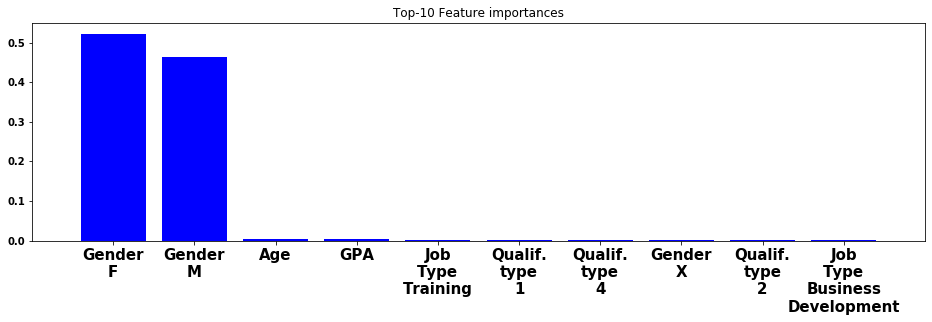

In [38]:
N = 10

# Plot the feature importances of the forest
plt.figure(figsize=(16, 4))
plt.title("Top-{} Feature importances".format(N))
# plt.bar(range(len(feature_names)), importances[indices], color="b", align="center")
plt.bar(range(N), importances[indices][:N], color="b", align="center")
# plt.xticks(range(len(feature_names)), indices)
plt.xticks(range(N), [ feature_names[index].replace('Qualification', 'Qualif.').replace('_', '\n').replace(' ', '\n') for index in indices[:N] ],  fontsize=15)
plt.xlim([-1, N])
plt.savefig('../../figures/modelling_Random_Forest_Top_10_Feature_Importances_Bias_Data.png', bbox_inches="tight")
plt.show()